# 以VOC2007的person类别进行数据增强

In [253]:
import glob
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import xml.etree.ElementTree as ET

In [254]:
from random import randint
import random

In [255]:
xml_src = glob.glob("./Annotations-mini/*.xml")
print(xml_src)
print(len(xml_src))

['./Annotations-mini\\2007_006260.xml', './Annotations-mini\\2007_006277.xml', './Annotations-mini\\2007_006281.xml', './Annotations-mini\\2007_006317.xml', './Annotations-mini\\2007_006409.xml', './Annotations-mini\\2007_006444.xml', './Annotations-mini\\2007_006449.xml']
7


In [256]:
num_imgs = 0
person_img_names = []

for xml_path in xml_src:
    
    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            if obj_name == "person": 
                num_imgs += 1
                
                img_basename = os.path.basename(xml_path)
                img_onlyname = os.path.splitext(img_basename)
                person_img_names.append(img_onlyname[0])
                
                break

print(num_imgs)
print(img_basename)
print(img_onlyname)
print(person_img_names)

3
2007_006444.xml
('2007_006444', '.xml')
['2007_006317', '2007_006409', '2007_006444']


In [257]:
# Names of Images Including Person: Array: person_img_names
#输出包含人的图片名字：person_img_names
print(person_img_names[0])
print(person_img_names[1])
print(person_img_names[2])
#print(person_img_names[3]
print(len(person_img_names))

2007_006317
2007_006409
2007_006444
3


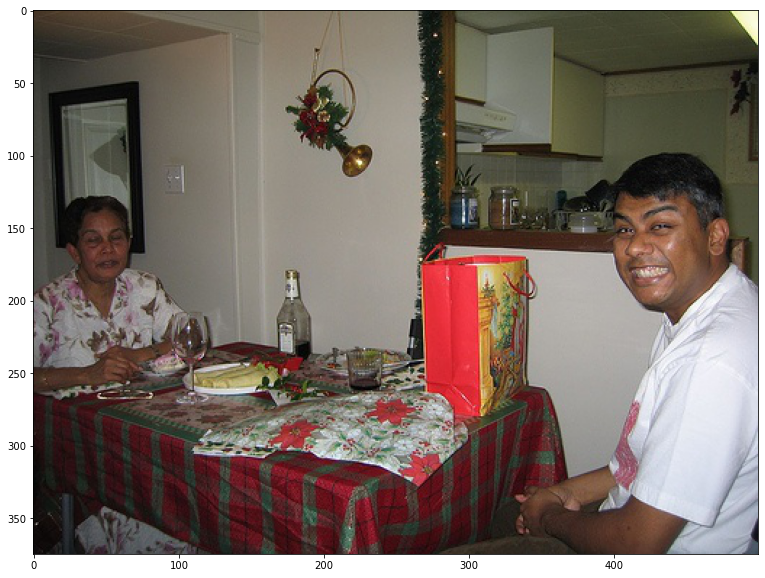

In [258]:
test_img = plt.imread("./JPEGImages-mini/" + person_img_names[randint(0,2 )] + ".jpg")
plt.figure(figsize = (15, 10))
plt.imshow(test_img)

# 生成包括person类别的子图和标注

In [187]:
# Generate sub-image data
count = 0

sub_names = []
sub_infor = []

for img_name in person_img_names:
    count += 1
    
    img_path = "./JPEGImages-mini/" + img_name + ".jpg"
    xml_path = "./Annotations-mini/" + img_name + ".xml"

    image = cv2.imread(img_path)

    img_info = []
    img_info0 = []
    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        
        for obj0 in root.findall('size'):
            width = obj0.find('width').text
            height = obj0.find('height').text
            img_info0.append([width,height])
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            bndbox = obj.find('bndbox')
            left = bndbox.find('xmin').text
            #left = in(left)*360//int(obj[5])
            top = bndbox.find('ymin').text
            right = bndbox.find('xmax').text
            bottom = bndbox.find('ymax').text

            img_info.append([obj_name, left, top, right, bottom, width,height])
            #print(img_info[])
            #print(img_info)

    print("Img", count, "- Num of Objs: ", len(img_info))
    print(image.shape[0])
    print(image.shape[1])
    print(image.shape[2])
   # print(img_info)
    #print(img_info0)

Img 1 - Num of Objs:  3
375
500
3
Img 2 - Num of Objs:  4
375
500
3
Img 3 - Num of Objs:  2
375
500
3


In [259]:
# Generate sub-image data
count = 0

sub_names = []
sub_infor = []

for img_name in person_img_names:
    count += 1
    
    img_path = "./JPEGImages-mini/" + img_name + ".jpg"
    xml_path = "./Annotations-mini/" + img_name + ".xml"

    image = cv2.imread(img_path)

    img_info = []
    #img_info0 = []
    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        
        #for obj0 in root.findall('size'):
           # width = obj0.find('width').text
           # height = obj0.find('height').text
           # img_info0.append([width,height])
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            bndbox = obj.find('bndbox')
            left = bndbox.find('xmin').text
            top = bndbox.find('ymin').text
            right = bndbox.find('xmax').text
            bottom = bndbox.find('ymax').text

            img_info.append([obj_name, left, top, right, bottom])

    print("Img", count, "- Num of Objs: ", len(img_info))
    print(img_info)
   # print(img_info0)

    # Innitialize
    #new_w = 500//2
    #new_h = 375//2

    # Crop Image
    #cropped_img_0 = image[0:new_h, 0:new_w]
    #cropped_img_1 = image[0:new_h, 360//2:360]
    #cropped_img_2 = image[360//2:360, 0:new_w]
    #cropped_img_3 = image[360//2:360, 360//2:360]
    
    # Innitialize
    new_w = image.shape[1]//2
    new_h = image.shape[0]//2

    # Crop Image
    cropped_img_0 = image[0:new_h, 0:new_w]
    cropped_img_1 = image[0:new_h, image.shape[1]//2:image.shape[1]]
    cropped_img_2 = image[image.shape[0]//2:image.shape[0], 0:new_w]
    cropped_img_3 = image[image.shape[0]//2:image.shape[0], image.shape[1]//2:image.shape[1]]


    # TOP-LEFT
    new_img_info_0 = []

    for obj in img_info:
        x1 = int(obj[1])
        y1 = int(obj[2])
        
        if x1 < new_w and y1 < new_h:
            x2 = int(obj[3])
            y2 = int(obj[4])
            if x2 > new_w: x2 = new_w
            if y2 > new_h: y2 = new_h

            new_img_info_0.append([obj[0], x1, y1, x2, y2])

    # TOP-RIGHT
    new_img_info_1 = []

    for obj in img_info:
        x1 = int(obj[1]) - new_w
        x2 = int(obj[3])- new_w
        y1 = int(obj[2])

        if x2 > 0 and y1 < new_h:
            if x1 < 0: x1 = 0
            y2 = int(obj[4])
            if y2 > new_h: y2 = new_h

            new_img_info_1.append([obj[0], x1, y1, x2, y2])

    # BOTTOM-LEFT
    new_img_info_2 = []

    for obj in img_info:
        y1 = int(obj[2]) - new_h
        y2 = int(obj[4]) - new_h
        x1 = int(obj[1])

        if y2 > 0 and x1 < new_w:
            if y1 < 0: y1 = 0
            x2 = int(obj[3])
            if x2 > new_w: x2 = new_w

            new_img_info_2.append([obj[0], x1, y1, x2, y2])

    # BOTTOM-RIGHT
    new_img_info_3 = []

    for obj in img_info:
        x1 = int(obj[1]) - new_w
        y1 = int(obj[2]) - new_h
        x2 = int(obj[3]) - new_w
        y2 = int(obj[4]) - new_h

        if x2 > 0 and y2 > 0:
            if x1 < 0: x1 = 0
            if y1 < 0: y1 = 0

            new_img_info_3.append([obj[0], x1, y1, x2, y2])

    for infor_i in new_img_info_0:
        if infor_i[0] == "person":
            # Write Image
            cv2.imwrite("./sub-images-mini/" + img_name + "_0.jpg", cropped_img_0)
            
            # Write Text
            text_file = open("./sub-annotations-mini/" + img_name + "_0.txt", "w+")
            for infor in new_img_info_0:
                print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
            text_file.close()
            
            break
            
    for infor_i in new_img_info_1:
        if infor_i[0] == "person":
            # Write Image
            cv2.imwrite("./sub-images-mini/" + img_name + "_1.jpg", cropped_img_1)
            
            # Write Text
            text_file = open("./sub-annotations-mini/" + img_name + "_1.txt", "w+")
            for infor in new_img_info_1: 
                print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
            text_file.close()
            
            break
            
    for infor_i in new_img_info_2:
        if infor_i[0] == "person":
            # Write Image
            cv2.imwrite("./sub-images-mini/" + img_name + "_2.jpg", cropped_img_2)
            
            # Write Text
            text_file = open("./sub-annotations-mini/" + img_name + "_2.txt", "w+")
            for infor in new_img_info_2: 
                print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
            text_file.close()
            
            break
            
    for infor_i in new_img_info_3:
        if infor_i[0] == "person":
            # Write Image
            cv2.imwrite("./sub-images-mini/" + img_name + "_3.jpg", cropped_img_3)
            
            # Write Text
            text_file = open("./sub-annotations-mini/" + img_name + "_3.txt", "w+")
            for infor in new_img_info_3: 
                print(infor[0], infor[1], infor[2], infor[3], infor[4], file=text_file)
            text_file.close()
            
            break
    
    # if count == 10: break
    
print(count)


Img 1 - Num of Objs:  3
[['bus', '1', '2', '500', '301'], ['bicycle', '239', '209', '478', '375'], ['person', '249', '67', '396', '368']]
Img 2 - Num of Objs:  4
[['person', '304', '98', '500', '375'], ['person', '1', '128', '114', '264'], ['bottle', '167', '178', '193', '241'], ['diningtable', '8', '227', '376', '375']]
Img 3 - Num of Objs:  2
[['dog', '134', '146', '271', '364'], ['person', '411', '3', '500', '229']]
3


# 测试图片+标注+画框

In [260]:
def file_lines_to_list(path):
    # open txt file lines to a list
    with open(path) as f:
        content = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    content = [(x.strip()).split() for x in content]
    return content

In [261]:
sub_img_src = glob.glob("./sub-images-mini/*.jpg")
sub_txt_src = glob.glob("./sub-annotations-mini/*.txt")

In [262]:
sub_img_names = []

for sub_img in sub_img_src:

    sub_basename = os.path.basename(sub_img)
    sub_onlyname = os.path.splitext(sub_basename)

    sub_img_names.append(sub_onlyname[0])
    
print("Num of sub images:", len(sub_img_names))

Num of sub images: 10


(187, 250, 3)


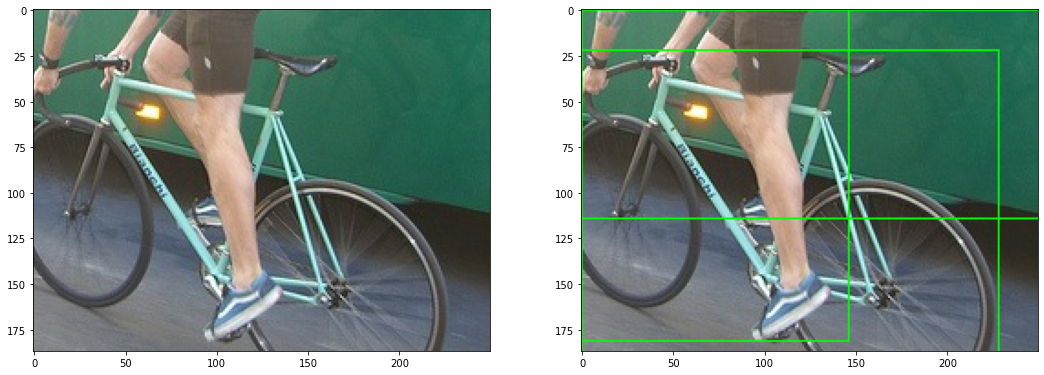

In [263]:
sub_img_name = sub_img_names[randint(0, len(sub_img_names))]
#sub_img_name = sub_img_names[randint(0, 20)]

test_sub_img = plt.imread("./sub-images-mini/" + sub_img_name + ".jpg")
annotation = file_lines_to_list("./sub-annotations-mini/" + sub_img_name + ".txt")

dymmy = test_sub_img.copy()
for obj in annotation:
    rec_img = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)

print(test_sub_img.shape)
plt.figure(figsize = (18, 10))
plt.subplot(121), plt.imshow(test_sub_img)
plt.subplot(122), plt.imshow(dymmy)
plt.show()

In [264]:
annotation = file_lines_to_list("./sub-annotations-mini/" + sub_img_name + ".txt")
annotation

[['bus', '0', '0', '250', '114'],
 ['bicycle', '0', '22', '228', '187'],
 ['person', '0', '0', '146', '181']]

# 测试类别

In [265]:
label_names = ['BACKGROUND','aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car',
               'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse',
               'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train',
               'tvmonitor']

In [266]:
label_cnts = np.zeros(21)

for sub_anno in sub_txt_src:
    annotation = file_lines_to_list(sub_anno)
    
    for obj in annotation:
        for i in range(len(label_names)):
            if obj[0] == label_names[i]: label_cnts[i] += 1

In [267]:
for i in range(len(label_names)):
    print(label_names[i], int(label_cnts[i]))

BACKGROUND 0
aeroplane 0
bicycle 2
bird 0
boat 0
bottle 2
bus 4
car 0
cat 0
chair 0
cow 0
diningtable 2
dog 2
horse 0
motorbike 0
person 10
pottedplant 0
sheep 0
sofa 0
train 0
tvmonitor 0


# 堆叠图片

In [268]:
sub_img_src = glob.glob("./sub-images-mini/*.jpg")
random.shuffle(sub_img_src)

sub_img_names = []

for sub_img in sub_img_src:

    sub_basename = os.path.basename(sub_img)
    sub_onlyname = os.path.splitext(sub_basename)

    sub_img_names.append(sub_onlyname[0])
    
print("Num of sub images:", len(sub_img_names))

Num of sub images: 10


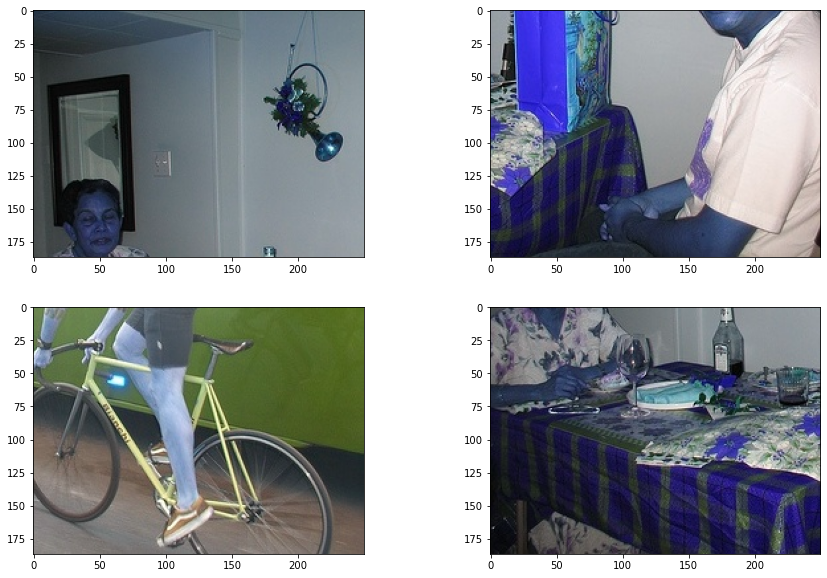

In [272]:
# for i in range(len(sub_img_src)):
for a in range(1):
    i = randint(0, 1)
    top_left = cv2.imread(sub_img_src[4*i])
    top_right = cv2.imread(sub_img_src[4*i + 1])
    bot_left = cv2.imread(sub_img_src[4*i + 2])
    bot_right = cv2.imread(sub_img_src[4*i + 3])
    
plt.figure(figsize = (15, 10))
plt.subplot(221), plt.imshow(top_left)
plt.subplot(222), plt.imshow(top_right)
plt.subplot(223), plt.imshow(bot_left)
plt.subplot(224), plt.imshow(bot_right)
plt.show()

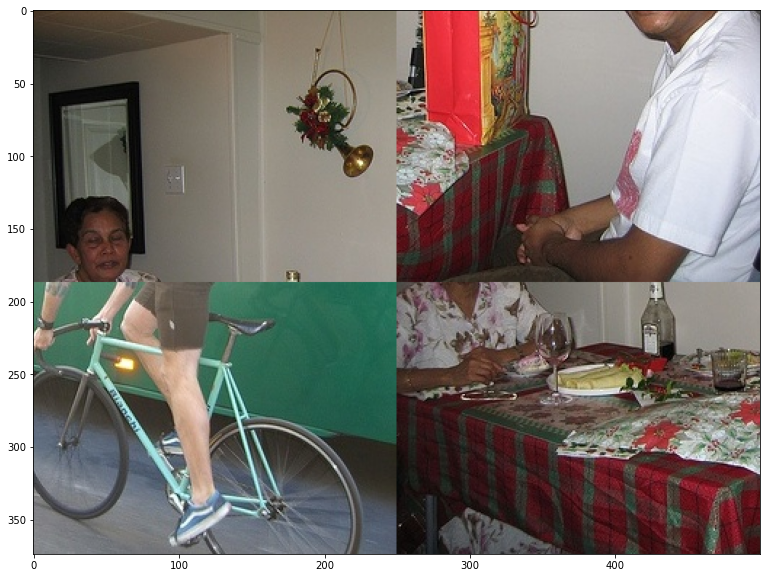

In [273]:
top = np.hstack((top_left, top_right))
bot = np.hstack((bot_left, bot_right))
full = np.vstack((top, bot))

plt.figure(figsize = (15, 10))
plt.imshow(cv2.cvtColor(full, cv2.COLOR_BGR2RGB))
plt.show()


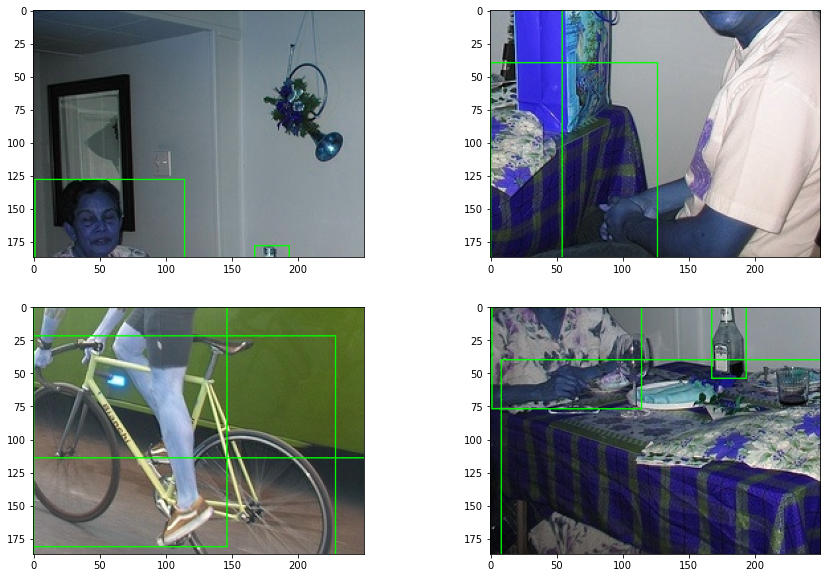

In [274]:
# for i in range(len(sub_img_src)):
for a in range(1):
#     i = randint(0, 1000)
    
    top_left = cv2.imread(sub_img_src[4*i])
    anno = file_lines_to_list("./sub-annotations-mini/" + sub_img_names[4*i] + ".txt")
    dymmy = top_left.copy()
    for obj in anno:
        rec_tf = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)
    
    top_right = cv2.imread(sub_img_src[4*i + 1])
    anno = file_lines_to_list("./sub-annotations-mini/" + sub_img_names[4*i + 1] + ".txt")
    dymmy = top_right.copy()
    for obj in anno:
        rec_tr = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)
    
    bot_left = cv2.imread(sub_img_src[4*i + 2])
    anno = file_lines_to_list("./sub-annotations-mini/" + sub_img_names[4*i + 2] + ".txt")
    dymmy = bot_left.copy()
    for obj in anno:
        rec_bl = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)

    bot_right = cv2.imread(sub_img_src[4*i + 3])
    anno = file_lines_to_list("./sub-annotations-mini/" + sub_img_names[4*i + 3] + ".txt")
    dymmy = bot_right.copy()
    for obj in anno:
        rec_br = cv2.rectangle(dymmy, (int(obj[1]), int(obj[2])), (int(obj[3]), int(obj[4])), (0, 255, 0), thickness = 1)
    
plt.figure(figsize = (15, 10))
plt.subplot(221), plt.imshow(rec_tf)
plt.subplot(222), plt.imshow(rec_tr)
plt.subplot(223), plt.imshow(rec_bl)
plt.subplot(224), plt.imshow(rec_br)
plt.show()

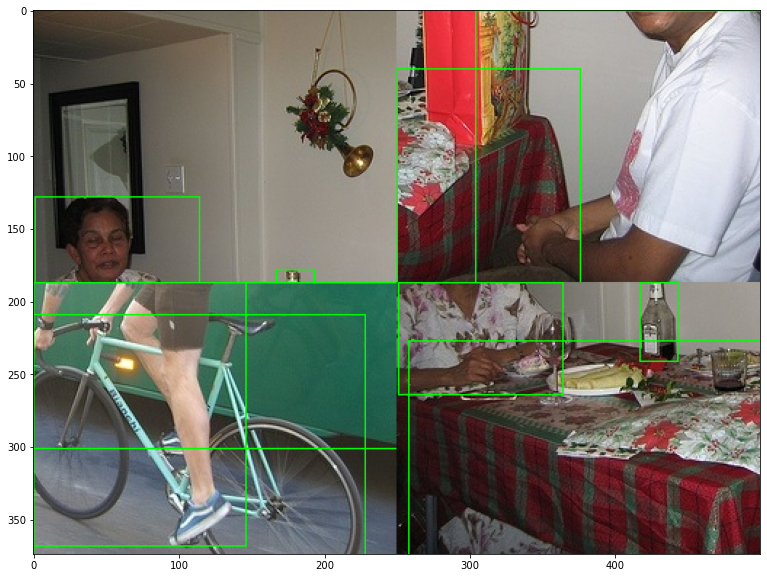

In [275]:
reg_top = np.hstack((rec_tf, rec_tr))
reg_bot = np.hstack((rec_bl, rec_br))
reg_full = np.vstack((reg_top, reg_bot))

plt.figure(figsize = (15, 10))
plt.imshow(cv2.cvtColor(reg_full, cv2.COLOR_BGR2RGB))
plt.show()


# 生成新的样本和标签

In [276]:
from xml.etree import ElementTree
from xml.dom import minidom
from xml.etree import ElementTree
from xml.etree.ElementTree import Element, SubElement
import os.path as osp

def prettify(elem):
    """Return a pretty-printed XML string for the Element.
        """
    rough_string = ElementTree.tostring(elem, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="\t")

In [277]:
sub_img_src = glob.glob("./sub-images-mini/*.jpg")
random.shuffle(sub_img_src)

sub_img_names = []

for sub_img in sub_img_src:

    sub_basename = os.path.basename(sub_img)
    sub_onlyname = os.path.splitext(sub_basename)

    sub_img_names.append(sub_onlyname[0])
    
print("Num of sub images:", len(sub_img_names))

Num of sub images: 10


In [278]:
w_offset = 250
h_offset = 187

for i in range(len(sub_img_src)//4):
    
    bbox = []
    
    top_left = cv2.imread(sub_img_src[4*i])
    anno = file_lines_to_list("./sub-annotations-mini/" + sub_img_names[4*i] + ".txt")
    for obj in anno:
        bbox.append(obj)
    
    top_right = cv2.imread(sub_img_src[4*i + 1])
    anno = file_lines_to_list("./sub-annotations-mini/" + sub_img_names[4*i + 1] + ".txt")
    for obj in anno:
        x1 = int(obj[1]) + w_offset
        x2 = int(obj[3]) + w_offset
        bbox.append([obj[0], x1, obj[2], x2, obj[4]])
    
    bot_left = cv2.imread(sub_img_src[4*i + 2])
    anno = file_lines_to_list("./sub-annotations-mini/" + sub_img_names[4*i + 2] + ".txt")
    for obj in anno:
        y1 = int(obj[2]) + h_offset
        y2 = int(obj[4]) + h_offset
        bbox.append([obj[0], obj[1], y1, obj[3], y2])
        
    bot_right = cv2.imread(sub_img_src[4*i + 3])
    anno = file_lines_to_list("./sub-annotations-mini/" + sub_img_names[4*i + 3] + ".txt")
    for obj in anno:
        x1 = int(obj[1]) + w_offset
        x2 = int(obj[3]) + w_offset
        y1 = int(obj[2]) + h_offset
        y2 = int(obj[4]) + h_offset
        bbox.append([obj[0], x1, y1, x2, y2])
    
    top = np.hstack((top_left, top_right))
    bot = np.hstack((bot_left, bot_right))
    full = np.vstack((top, bot))
        
    bbox = np.array(bbox)  
    annotation = Element('annotation')
    
    SubElement(annotation, 'filename').text = sub_img_names[4*i] + "_stack.jpg"
    SubElement(annotation, 'folder').text = "VOC2007"
        
        
    size_ = SubElement(annotation, 'size')
    SubElement(size_,'width').text = str(360)
    SubElement(size_,'height').text = str(360)
    
    for obj in bbox:

        
        #SubElement(annotation, 'filename').text = sub_img_names[4*i] + "_stack.jpg"
        #SubElement(annotation, 'folder').text = "VOC2007"
        
        
        #size_ = SubElement(annotation, 'size')
        #SubElement(size_,'width').text = str(360)
        #SubElement(size_,'height').text = str(360)
        
        object_ = Element('object')
        SubElement(object_, 'name').text = obj[0]

        bndbox = Element('bndbox')
        SubElement(bndbox, 'xmin').text = obj[1]
        SubElement(bndbox, 'ymin').text = obj[2]
        SubElement(bndbox, 'xmax').text = obj[3]
        SubElement(bndbox, 'ymax').text = obj[4]

        object_.append(bndbox)

        annotation.append(object_)
        
 
    cv2.imwrite("./full-images-mini/" + sub_img_names[4*i] + "_stack.jpg", full)
    # Write XML
    with open(osp.join("./full-annotations-mini/" + sub_img_names[4*i] + "_stack.xml"), 'w') as f:
        f.write(prettify(annotation))

    print(i)


0
1


In [89]:
361//2

180